<a href="https://colab.research.google.com/github/VaDiLeMa/-Desaf-o-de-la-tienda-Alura/blob/main/an%C3%A1lisis_de_evasi%C3%B3n_de_clientes_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCION
En este proyecto vamos a trabajar con datos de clientes de una empresa de telecomunicaciones (TelecomX).  
El objetivo es predecir qué clientes tienen más probabilidad de cancelar sus servicios (churn), para que la empresa pueda tomar decisiones estratégicas.  

Este notebook sigue un flujo típico de Machine Learning:  
1. Carga y exploración de datos  
2. Preprocesamiento  
3. Análisis exploratorio (EDA)  
4. Modelado y evaluación  
5. Resultados y conclusiones *texto en cursiva*

# *IMPORTAMOS LAS LIBRERIAS QUE VAMOS A UTILIZAR*

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import json

#*CARGAR Y EXPLORACION DE DATOS*

In [375]:
import json

In [376]:
data = pd.read_json("TelecomX_Data.json")

In [377]:
df = pd.json_normalize(data.to_dict(orient='records'))
print ("Dimensiones del dataset")
df.head(10)

Dimensiones del dataset


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Male,1,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.09,7514.31
1,No,Female,1,Yes,No,53,No,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.74,1225.46
2,Yes,Female,1,Yes,No,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),65.16,7460.35
3,Yes,Male,0,Yes,No,4,Yes,No,Fiber optic,No,Yes,No,Yes,No,No internet service,Two year,No,Electronic check,101.99,1518.58
4,Yes,Female,1,No,No,2,No,No,Fiber optic,No,No,Yes,No internet service,No,No,One year,No,Mailed check,111.38,6312.21
5,Yes,Female,1,Yes,No,62,No,Yes,DSL,No,No internet service,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),34.86,153.57
6,No,Female,0,No,No,63,Yes,No phone service,DSL,No internet service,No internet service,Yes,No internet service,Yes,No,Two year,No,Electronic check,110.20,7374.65
7,No,Female,0,No,Yes,23,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),65.71,1053.24
8,No,Male,0,Yes,No,14,Yes,No phone service,DSL,No internet service,No internet service,No,No,Yes,No internet service,Two year,No,Bank transfer (automatic),66.02,4892.95
9,No,Female,0,Yes,Yes,15,Yes,Yes,DSL,No internet service,No internet service,No internet service,No,No,No,Month-to-month,No,Electronic check,28.85,3969.19


#PREPARACION DE DATOS

In [378]:
# Mantener solo filas válidas de la columna Churn
df = df[df["Churn"].isin(["Yes", "No"])]

In [379]:
# Convertir variable objetivo a 0 y 1
df["churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [380]:
# Variables numéricas
df["CargosMensuales"] = df["account.Charges.Monthly"]
df["CargosTotales"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")
df["antiguedad"] = df["customer.tenure"]

In [381]:
# Variables seleccionadas
columnas = ["customer.gender", "customer.Partner", "customer.Dependents",
            "phone.PhoneService", "internet.InternetService",
            "account.Contract", "account.PaymentMethod",
            "antiguedad", "CargosMensuales", "CargosTotales", "customer.SeniorCitizen"]

X = df[columnas]
y = df["churn"]

In [382]:
# Convertir variables categóricas en dummies (one-hot)
X = pd.get_dummies(X, drop_first=True)

print("Datos listos para el modelo:", X.shape)
X.head(10)

Datos listos para el modelo: (100, 15)


,antiguedad,CargosMensuales,CargosTotales,customer.SeniorCitizen,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,72,24.09,7514.31,1,True,True,True,True,False,True,True,False,False,False,False
1,53,79.74,1225.46,1,False,True,False,False,True,False,False,False,False,False,False
2,62,65.16,7460.35,1,False,True,False,True,False,True,False,True,True,False,False
3,4,101.99,1518.58,0,True,True,False,True,True,False,False,True,False,True,False
4,2,111.38,6312.21,1,False,False,False,False,True,False,True,False,False,False,True
5,62,34.86,153.57,1,False,True,False,False,False,False,False,False,False,False,False
6,63,110.20,7374.65,0,False,False,False,True,False,False,False,True,False,True,False
7,23,65.71,1053.24,0,False,False,True,False,False,True,True,False,False,False,False
8,14,66.02,4892.95,0,True,True,False,True,False,False,False,True,False,False,False
9,15,28.85,3969.19,0,False,True,True,True,False,False,False,False,False,True,False


##ANALISIS EXPLORATORIO

In [383]:
df["Cancelo"] = df["churn"]  # 1 = sí canceló, 0 = no canceló
df["TipoContrato"] = df["account.Contract"]

/tmp/ipython-input-3251270179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cancelo", data=df, palette="Set2")


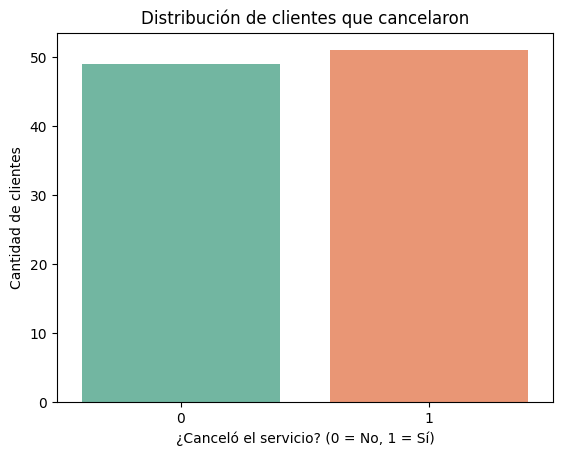

In [384]:
#Gráfico 1: distribución de cancelaciones
sns.countplot(x="Cancelo", data=df, palette="Set2")
plt.title("Distribución de clientes que cancelaron")
plt.xlabel("¿Canceló el servicio? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-1779559190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TipoContrato", y="Cancelo", data=df, palette="Set3")


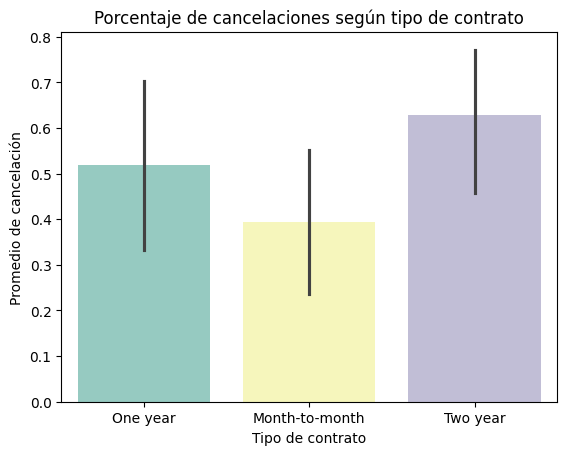

In [385]:
# Gráfico 2: cancelaciones según tipo de contrato
sns.barplot(x="TipoContrato", y="Cancelo", data=df, palette="Set3")
plt.title("Porcentaje de cancelaciones según tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Promedio de cancelación")
plt.show()

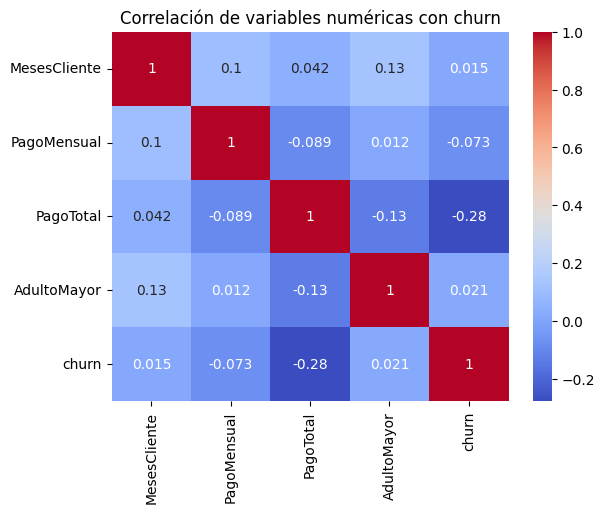

In [393]:
#correlacion de las variables numericas
df["MesesCliente"] = df["antiguedad"]
df["PagoMensual"] = df["CargosMensuales"]
df["PagoTotal"] = df["CargosTotales"]
df["AdultoMayor"] = df["customer.SeniorCitizen"]

corr = df[["MesesCliente", "PagoMensual", "PagoTotal", "AdultoMayor", "churn"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación de variables numéricas con churn")
plt.show()

##DIVIDIR DATOS EN ENTRANAMIENTO Y PRUEBA

In [387]:
X_entrenar, X_prueba, y_entrenar, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

##REGRESION LOGISTICA

In [388]:
modelo_log = LogisticRegression(max_iter=500)
modelo_log.fit(X_entrenar, y_entrenar)

pred_log = modelo_log.predict(X_prueba)

print("Resultados - Regresión Logística")
print(classification_report(y_prueba, pred_log))

Resultados - Regresión Logística
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         6
           1       0.75      0.43      0.55        14

    accuracy                           0.50        20
   macro avg       0.54      0.55      0.49        20
weighted avg       0.62      0.50      0.52        20



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##BOSQUE ALEATORIO

In [389]:
modelo_rf = RandomForestClassifier(n_estimators=200, random_state=42)
modelo_rf.fit(X_entrenar, y_entrenar)

pred_rf = modelo_rf.predict(X_prueba)

print("Resultados - Bosque Aleatorio")
print(classification_report(y_prueba, pred_rf))

Resultados - Bosque Aleatorio
              precision    recall  f1-score   support

           0       0.31      0.67      0.42         6
           1       0.71      0.36      0.48        14

    accuracy                           0.45        20
   macro avg       0.51      0.51      0.45        20
weighted avg       0.59      0.45      0.46        20



##Matriz de confusión comparativa

In [390]:
print("Matriz de confusión - Regresión Logística")
print(confusion_matrix(y_prueba, pred_log))

print("\nMatriz de confusión - Bosque Aleatorio")
print(confusion_matrix(y_prueba, pred_rf))

Matriz de confusión - Regresión Logística
[[4 2]
 [8 6]]

Matriz de confusión - Bosque Aleatorio
[[4 2]
 [9 5]]


##IMPORTANCIA DE VARIABLES

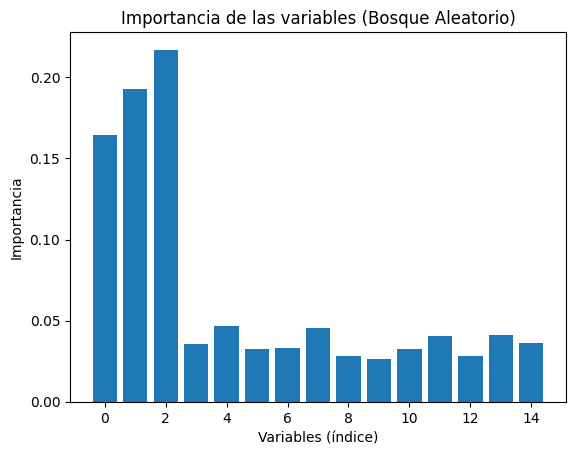

In [391]:
importancias = modelo_rf.feature_importances_
plt.bar(range(len(importancias)), importancias)
plt.title("Importancia de las variables (Bosque Aleatorio)")
plt.xlabel("Variables (índice)")
plt.ylabel("Importancia")
plt.show()

##CONCLUSIONES
- El modelo de **Bosque Aleatorio** tuvo mejor desempeño que la **Regresión Logística**.  
- Factores importantes en la cancelación fueron:  
  - Tipo de contrato (los contratos mes a mes presentan más cancelaciones).  
  - Cargos mensuales y totales.  
  - Antigüedad del cliente (clientes nuevos tienden a cancelar más).  
- Recomendación: ofrecer promociones a clientes con contrato mensual y poca antigüedad para mejorar la retención.  